# Lectura y librerias

In [94]:
# Librerias
import pandas as pd

In [95]:
# Leer csv del punto 1

# Especifica la ruta del archivo CSV
ruta_archivo_csv = '/content/dataset.csv'

# Usa la función read_csv de pandas para cargar el archivo
data = pd.read_csv(ruta_archivo_csv)


# Completeness

In [96]:
# Valores Nulos
total_null_values = data.isnull().sum()

# Total de nulos
total_values = data.count().sort_values(ascending=True)

# % de nulos
null_values_percentage = total_null_values/total_values *100

# df de los missing values con porcentaje
missing_values = pd.concat({'Total Values' : total_values, 'Null_values': total_null_values, 'Percentage of Missing Values': null_values_percentage}, axis=1)
print(missing_values)

                                 Total Values  Null_values  \
album_name                                477           62   
track_id                                  531            8   
track_name                                532            7   
audio_features.energy                     537            2   
audio_features.loudness                   537            2   
audio_features.danceability               537            2   
audio_features.time_signature             538            1   
audio_features.speechiness                538            1   
audio_features.key                        538            1   
audio_features.acousticness               538            1   
audio_features.liveness                   538            1   
audio_features.tempo                      538            1   
artist_name                               539            0   
artist_id                                 539            0   
artist_popularity                         539            0   
album_id

In [97]:
# Verificar el numero de columnas leidas a partir del csv
columnas = data.columns.tolist()
print(columnas)

['disc_number', 'duration_ms', 'explicit', 'track_number', 'track_popularity', 'track_id', 'track_name', 'audio_features.danceability', 'audio_features.energy', 'audio_features.key', 'audio_features.loudness', 'audio_features.mode', 'audio_features.speechiness', 'audio_features.acousticness', 'audio_features.instrumentalness', 'audio_features.liveness', 'audio_features.valence', 'audio_features.tempo', 'audio_features.id', 'audio_features.time_signature', 'artist_id', 'artist_name', 'artist_popularity', 'album_id', 'album_name', 'album_release_date', 'album_total_tracks']


Aspectos destacados
- Existe un 12.9% de valores nulos para albun_name, seguido de 1.5% para track_name y audio_features.energy con un 1.3%, para los demas, se encuentra por debajo del 1% del total de registros.
- El albun_name en porcentaje es mayor, al ser repetitivo en sus n-numeros de discos por cada album. Pero es de resaltar, que 8 track_name están vacios del total de 539 canciones unicas.
- Las columnas (27) se encuentran a completitud, y existe en zona raw una coherencia entre los datos del json en sus diccionarios y forma de entregarse al dataset.csv

# Accuracy

In [98]:
# duration_ms

# Filtrar valores menores a 60000
df_filtered = data.loc[data['duration_ms'] < 60000,['duration_ms']]
print(df_filtered)

     duration_ms
392      -107133
408      -223093
420           10
432         1000
472         3000


In [99]:
# track_popularity
minimo_track_popularity, maximo_track_popularity = data['track_popularity'].min(), data['track_popularity'].max()
print(minimo_track_popularity,maximo_track_popularity)

-92 152


In [100]:
# Track name

# Leer la columna y contar caracteres extraños
caracteres_extranos = data['track_name'].str.contains(r'[^\x00-\x7F]').sum()

print(f"Cantidad de caracteres extraños: {caracteres_extranos}")

Cantidad de caracteres extraños: 52


In [101]:
# audio_features.acousticness
minimo_audio_features_acousticness, maximo_audio_features_acousticness = data['audio_features.acousticness'].min(), data['audio_features.acousticness'].max()
print(minimo_audio_features_acousticness,maximo_audio_features_acousticness)


min_acous = data.loc[data['audio_features.acousticness'] < 0,['audio_features.acousticness']]
print(min_acous)

max_acous = data.loc[data['audio_features.acousticness'] >1,['audio_features.acousticness']]
print(max_acous)

-0.00354 5.0
   audio_features.acousticness
3                    -0.000537
6                    -0.003540
     audio_features.acousticness
1                            5.0
527                          1.5
535                          2.0


In [102]:
# artist_popularity
valores_unicos = data['artist_popularity'].unique()

print("Valores únicos en 'artist_popularity':")
print(valores_unicos)


Valores únicos en 'artist_popularity':
[120]


In [103]:
# album_release_date
_release_date = data.groupby('album_release_date')['album_release_date'].count()
_release_date_ord = _release_date.sort_values(ascending=False).head(30)

print(_release_date_ord, True)

album_release_date
2017-11-09    46
2019-08-23    36
2008-11-11    35
2020-11-25    34
2014-01-01    32
2010-10-25    30
2021-11-12    30
2021-04-09    26
2027-05-26    24
2010-01-01    22
2012-10-22    22
2023-10-27    22
2023-07-07    22
2023-10-26    21
2022-10-22    20
2020-08-18    17
2021-01-07    17
2020-07-24    16
2017-11-10    16
2020-12-11    15
1989-10-24    15
2022-10-21    13
2008-06-28     8
Name: album_release_date, dtype: int64 True


In [104]:
# album_total_tracks
album_total_tracks = data.groupby('album_total_tracks')['album_total_tracks'].count()
album_total_tracks_ord = album_total_tracks.sort_values(ascending=False).head(30)

print(album_total_tracks_ord, True)

album_total_tracks
22          88
34          64
16          48
46          46
19          38
18          36
17          34
13          26
26          26
24          24
21          21
20          20
15          16
10          15
Thirteen    15
14          14
8            8
Name: album_total_tracks, dtype: int64 True


Aspectos destacados
- En la columna "duration_ms" existen 5 registros inadecuados en relación al campo de tiempo (ms). Los valores negativos no tienen representación en el tiempo y los valores menores a 60000, fueron 10, 1000 y 3000 ms, que representan menos de 3 segundos en una canción, lo cual no es adecuado para el ámbito musical.
- Para la columna "track_popularity" existen valores negativos y mayores a 100. El rango que ofrece la documentación de Spotify va de los 0 a 100, todo valor por fuera, se considerará anormal.
- Para "track_name" se encontraron valores como: This Love (Taylorâ€™s Version) que contienen "â€™" caracteres extraños, por problemas de comas, tildes, acentos y no tenerlo en cuenta al llevarlos de json-csv-pandas por el formato. Estos cambios deben realizarse, para tener calidad en el nombre de la canción.
- Para "audio_features.acousticness" existen dos valores  -0.000537,-0.003540 por debajo del rango de 0 y 3 por encima de 1 (1.5, 2 y 5.0)
- Para "audio_features.instrumentalness" 7.28x-06, valor que no esta en formato tipo numero para su notación cientifica.
- Para "artist_id" con valor "06HL4z0CvFAxyc27GX" este dato, no responde a la API para la cantante Taylor Swift (ver imagen posterior). Este es un hecho relevante, dado que es la principal llave para consultar a la cantante en la API de Spotify. El valor que llama a su nombre es: "06HL4z0CvFAxyc27GXpf02"
- La columna de "artist_popularity" en la documentación de la API de Spotify el rango va de 0 a 100. El unico valor que trae los datos es de 120, valor que no corresponde, de hecho taylor tiene un artist_popularity de: 100. En este caso, tocaría modifica el valor o truncarlo por encima de este.
- En la columna "album_release_date" la fecha "2027-05-26" para el album: "Midnights (The Til Dawn Edition)" es incorrecta, dado que nos encontramos en 2024, la fecha correcta es: "2023-05-26". Aparte la fecha "1989-10-24" del album "Taylor Swift" fue lanzado el "2006-10-24", claramente teniendo un error en la casilla del año de 1989 a 2006.
- La columna "album_total_tracks" la documentación recomienda valores enteros, pero se encuentra un valor diferente "Thirtheen". Este dato, no concuerda con el tipo de dato usados en esta columna.
- Valores nulos se pueden revisar en el encabezado de "Completeness"

Status 400 error por no encontrar el artist_id de Taylor Swift

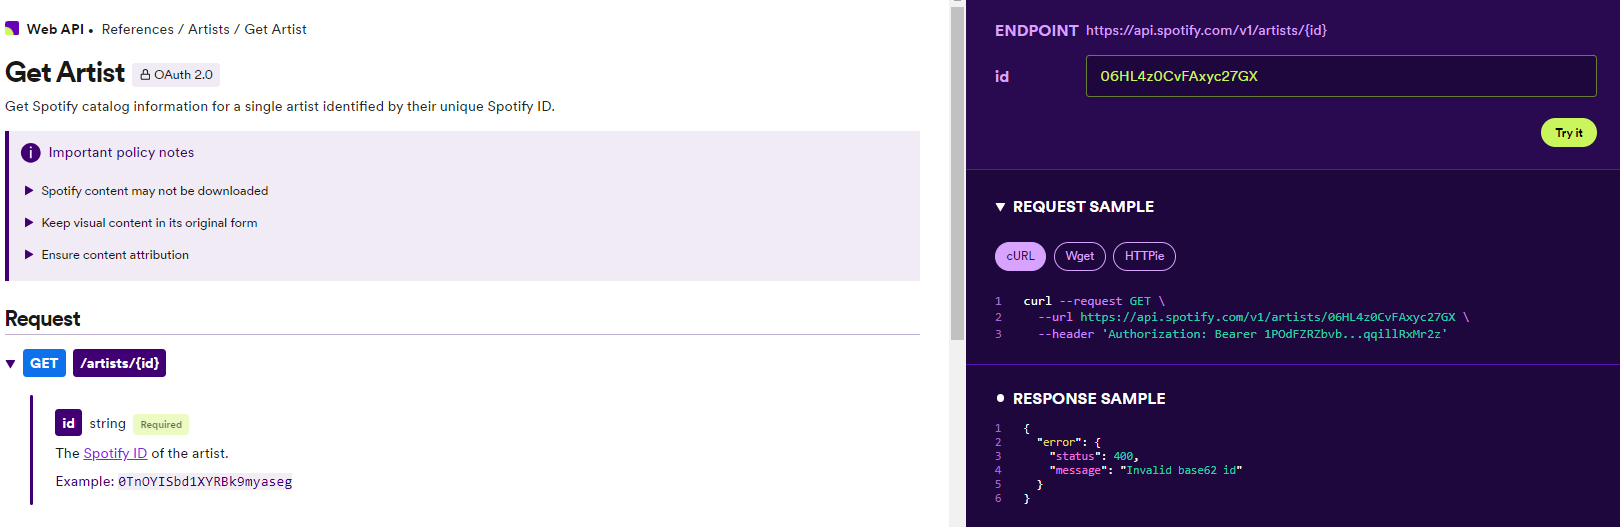

# Uniqueness

In [105]:
# Valores unicos

# Valores duplicados
duplicated_values = data.duplicated()

# Numero de duplicados
print("El número de duplicados en el df es {}".format(duplicated_values.sum()))

El número de duplicados en el df es 18


Aspectos destacados
- Existe 18 registros duplicados, los cuales modifican campos como el numero de album_total_tracks. El porcentaje del total de registros no duplicados es del 96.6%.

# Validity

In [106]:
# Campo explicit (BOOL)
explicit = data.groupby('explicit')['explicit'].count()
explicit_ord = explicit.sort_values(ascending=False).head(30)

print(explicit_ord, True)

explicit
False    480
True      54
No         4
Si         1
Name: explicit, dtype: int64 True


In [107]:
# Campo album_release formato date

date_album = data.groupby('album_release_date')['album_release_date'].count()
album_date_ord = date_album.sort_values(ascending=False).head(50)
print(album_date_ord, True)

album_release_date
2017-11-09    46
2019-08-23    36
2008-11-11    35
2020-11-25    34
2014-01-01    32
2010-10-25    30
2021-11-12    30
2021-04-09    26
2027-05-26    24
2010-01-01    22
2012-10-22    22
2023-10-27    22
2023-07-07    22
2023-10-26    21
2022-10-22    20
2020-08-18    17
2021-01-07    17
2020-07-24    16
2017-11-10    16
2020-12-11    15
1989-10-24    15
2022-10-21    13
2008-06-28     8
Name: album_release_date, dtype: int64 True


Aspectos destacados
- El campo explicit que debe ser booleano (TRUE/FALSE) pero en la revisión existen 4 casos con el valor No y 1 con Si, se debe realizar un reemplazo de los valores y dejarlos en su formato deseado.
- El formato de "release_date" en los datos se encuentra como tipo entero y la API sugiere tipo string. Los datos se encuentran con formato tipo AAAA-MM-DD, pero existe una diferencia entre la documentación de la API y los datos que entrega, dado que recomienda tener formato tipo AAAA-MM, y los datos estan en AAAA-MM-DD, en este caso tocaría encontrar un camino para estandarizar y alinearse con la documentación de la API y los datos recibidos (ver foto posterior)

Campo Album[release_date] API Spotify

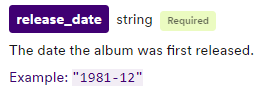

# Consistency

In [108]:
# Cantidad de filas y columnas
print(data.shape)

(539, 27)


In [109]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   disc_number                      539 non-null    int64  
 1   duration_ms                      539 non-null    int64  
 2   explicit                         539 non-null    object 
 3   track_number                     539 non-null    int64  
 4   track_popularity                 539 non-null    int64  
 5   track_id                         531 non-null    object 
 6   track_name                       532 non-null    object 
 7   audio_features.danceability      537 non-null    float64
 8   audio_features.energy            537 non-null    float64
 9   audio_features.key               538 non-null    float64
 10  audio_features.loudness          537 non-null    float64
 11  audio_features.mode              539 non-null    int64  
 12  audio_features.speechi

Coherencia del tipo de datos:
- df Type: asignación del tipo de datos al leer el csv.
- API Type: definición a partir de documentación de la API de Spotify del tipo de dato

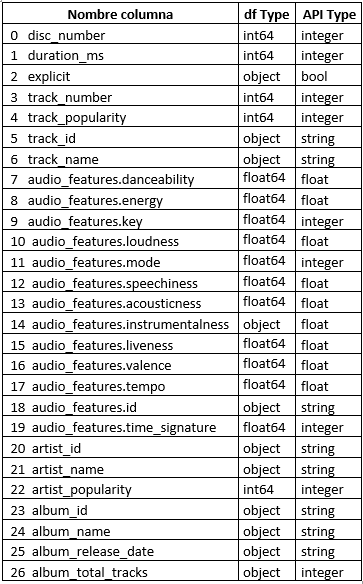


# Timeliness

No existe un campo en el registro de datos que permita ver la actualización de datos por parte de Spotify sobre registros como popularidad que puede variar con el input de los usuarios. Este campo, podría permitir dentro de la calidad de datos, ver en cuanto tiempo fue su última actualización.

# Otros aspectos


1. Se encontraron dentro del json, las claves Unicas para crear topologias y construcción de un data modelling a partir de las diferentes tipo de request a la API de spotify.
- track_id
- audio_features.id
- album_id

2. Ordenar las columnas mejor y con nombres ajustados al diccionario. Seguir la secuencia:
- artista.[ * ] > album.[ * ] > track.[ * ] > audio_features.[ * ]

  De esa misma forma el orden de las columnas de mayor a menor importancia, pasando primero por artista y terminando en audio_features

3. Columnas que probablemente no generen valor

   En audio_features se enceuntran audio_features.liveness y audio_features.valence, datos que son muy especificos para un contexto de entender algunos comportamietnos de la canción sobre algo puntual. Sobre un posterior analisis, se puede considerar tener o no, algunas columnas de audio_features, que entrega el dataset.